This notebook present the climatologies of precipitation

In [1]:
# load basic library

%config IPCompleter.greedy = True
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import xarray as xr
import senpy as sp

import matplotlib.pyplot as plt
plt.style.use('science')

# load OISSTv2 SST over 1982-2022
var_ds = sp.OBS_onemodel_precip(model='cmap', vars=['precip'], time_slice=slice('1979-01', '2022-12'))['precip']

# add cyclic point
var_ds = sp.add_cyclic_point(var_ds, dim='lon')

# monthly climatology relative to 1991-2020 and anomalies
var_m = var_ds.clim.climatology(clim_slice=slice('1991-01', '2020-12')).load()
var_a = var_ds.clim.anomalies(clim_slice=slice('1991-01', '2020-12')).load()

# annual mean climatology
var_ave_ann = var_m.mean('month')

# anomlaies standard deviation
var_std_ann = var_a.std('time')

# linear trend
var_trd_ann = var_ds.trendSig(dim='time', sigmask=False, siglvl=0.05)

## Precip climatological annual average

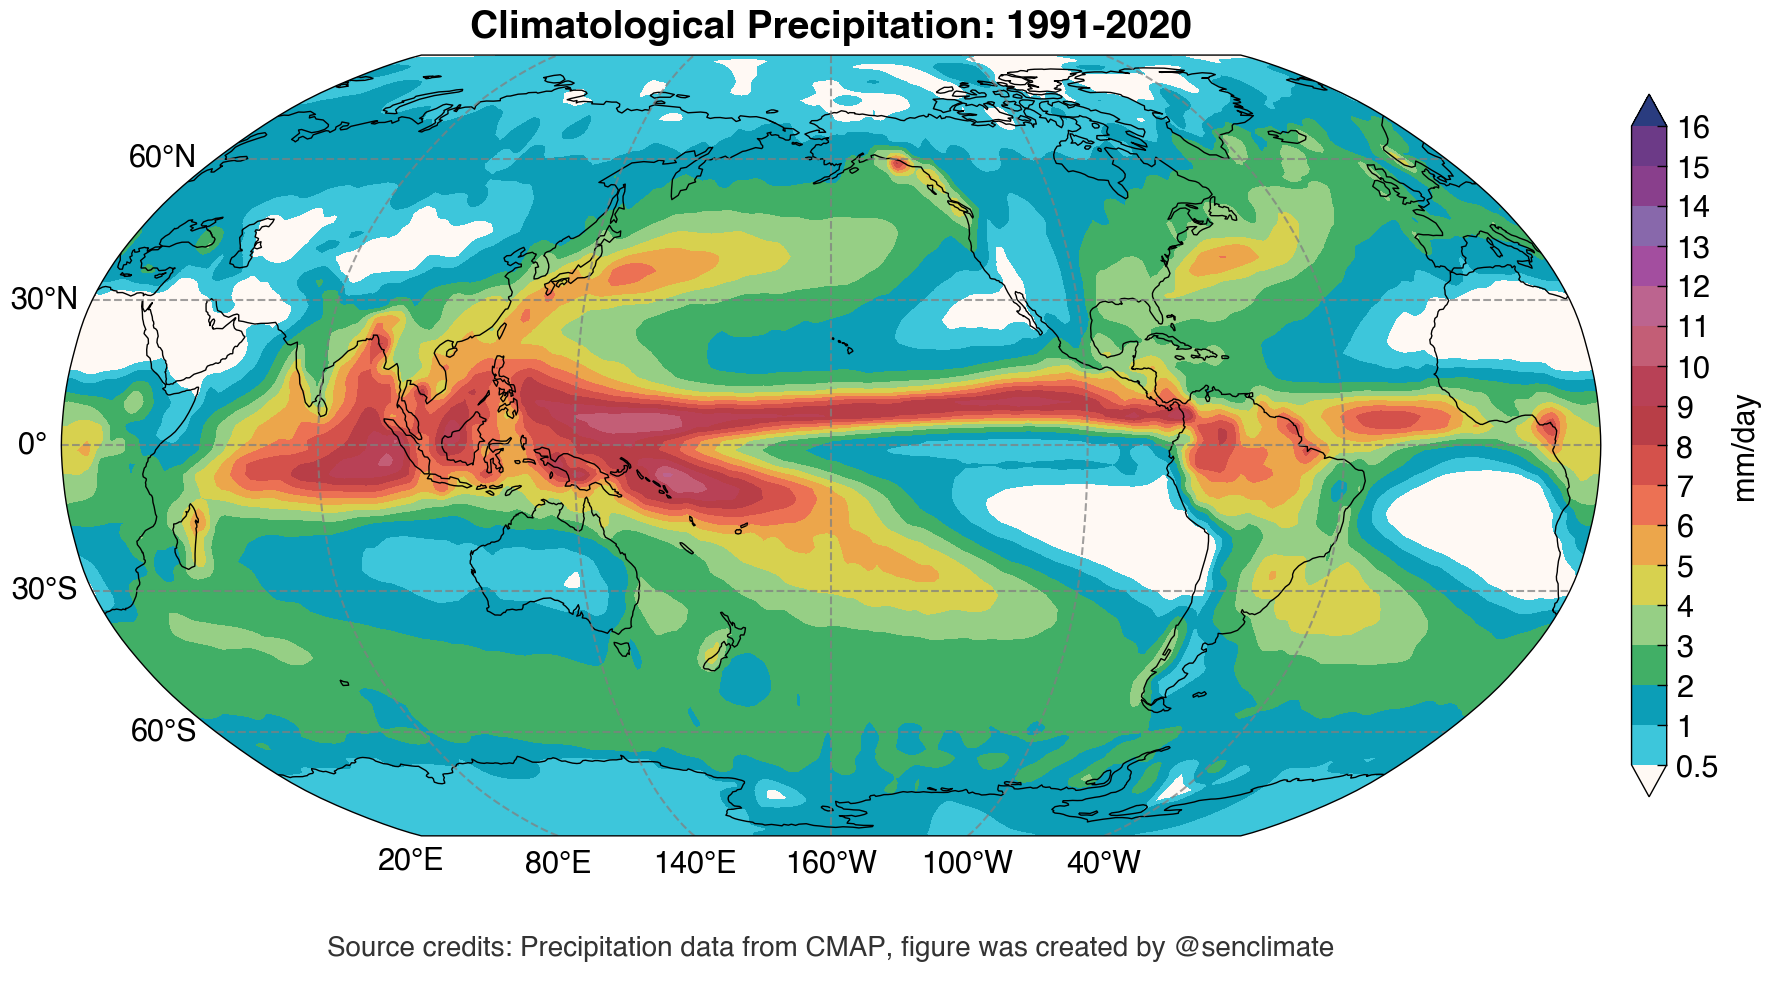

In [2]:
var_ave_cdict = sp.cmap.dict_cmap_contourf(levels=np.array( [0.5, 1., 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]), name='precip_clim', extend='both') 

fig, ax = sp.map_subplots(1, 1, figsize=(10, 5), proj='robin', lon_0=200, aspect=1., layout='compressed')

imag0 = ax.contourf(var_ave_ann.lon, var_ave_ann.lat, var_ave_ann, transform=sp.data_crs, **var_ave_cdict)
cb = fig.colorbar(imag0, ax=[ax], location='right', shrink=0.9, pad=0.02)
cb.set_label('mm/day')
cb.set_ticks(var_ave_cdict['levels'])
cb.ax.set_yticklabels(["{:g}".format(i) for i in cb.get_ticks()])

sp.map_coastline(ax, color='black')
# sp.map_landmask(ax, fc='white', alpha=0)
sp.map_ticks(ax, lon_ticks=np.arange(20, 380, step=60) )
ax.set_title("Climatological Precipitation: 1991-2020", fontsize=14, fontweight='bold')

# Add dataset and map sources
source_text = """
Source credits: Precipitation data from CMAP, figure was created by @senclimate
"""
ax.text(0.5, -0.2, source_text, transform=ax.transAxes, 
        fontsize=10, color='black', alpha=0.8, 
        ha='center', va='bottom', zorder=6);

## Precip anomalies standard deviation

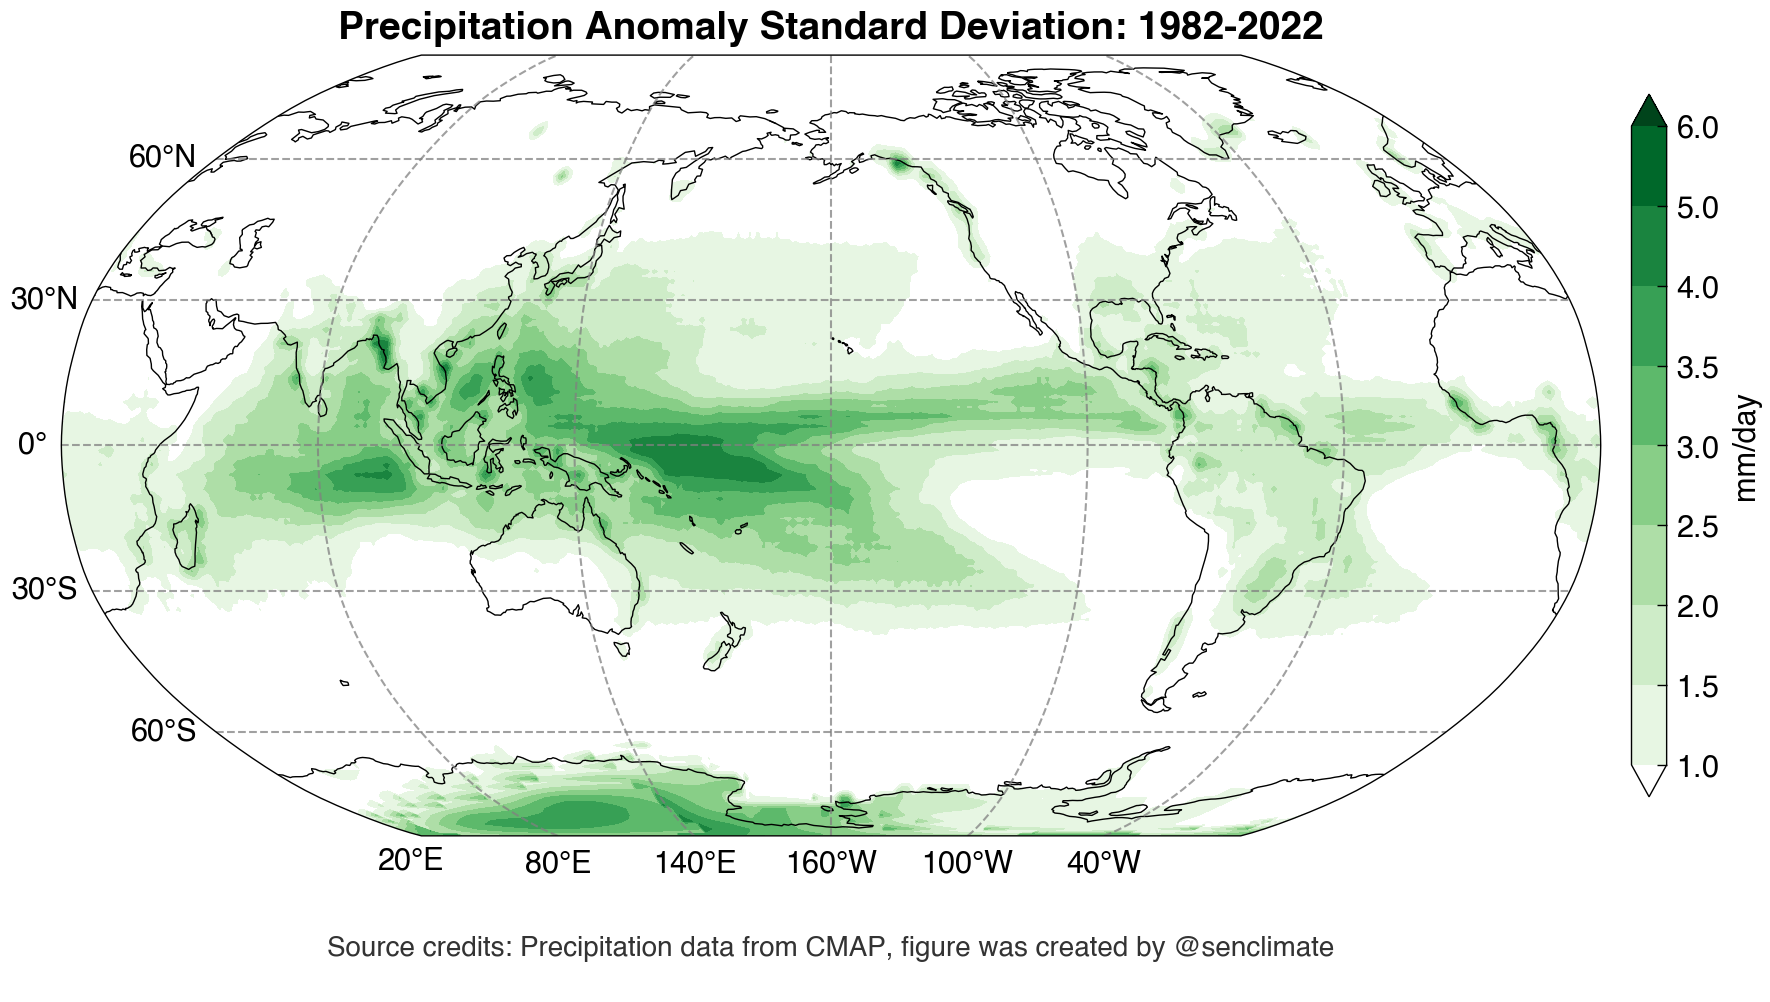

In [3]:
var_std_cdict = sp.cmap.dict_cmap_contourf(levels=np.array([1., 1.5, 2., 2.5, 3, 3.5,  4, 5, 6]), name='Greens', extend='both', start=True) 

fig, ax = sp.map_subplots(1, 1, figsize=(10, 5), proj='robin', lon_0=200, aspect=1., layout='compressed')

imag0 = ax.contourf(var_std_ann.lon, var_std_ann.lat, var_std_ann, transform=sp.data_crs, **var_std_cdict)
cb = fig.colorbar(imag0, ax=[ax], location='right', shrink=0.9, pad=0.02)
cb.set_label('mm/day')

sp.map_coastline(ax, color='black')
# sp.map_landmask(ax, fc='white', alpha=0)
sp.map_ticks(ax, lon_ticks=np.arange(20, 380, step=60) )
ax.set_title("Precipitation Anomaly Standard Deviation: 1982-2022", fontsize=14, fontweight='bold')

# Add dataset and map sources
source_text = """
Source credits: Precipitation data from CMAP, figure was created by @senclimate
"""
ax.text(0.5, -0.2, source_text, transform=ax.transAxes, 
        fontsize=10, color='black', alpha=0.8, 
        ha='center', va='bottom', zorder=6);

## Precip linear trends

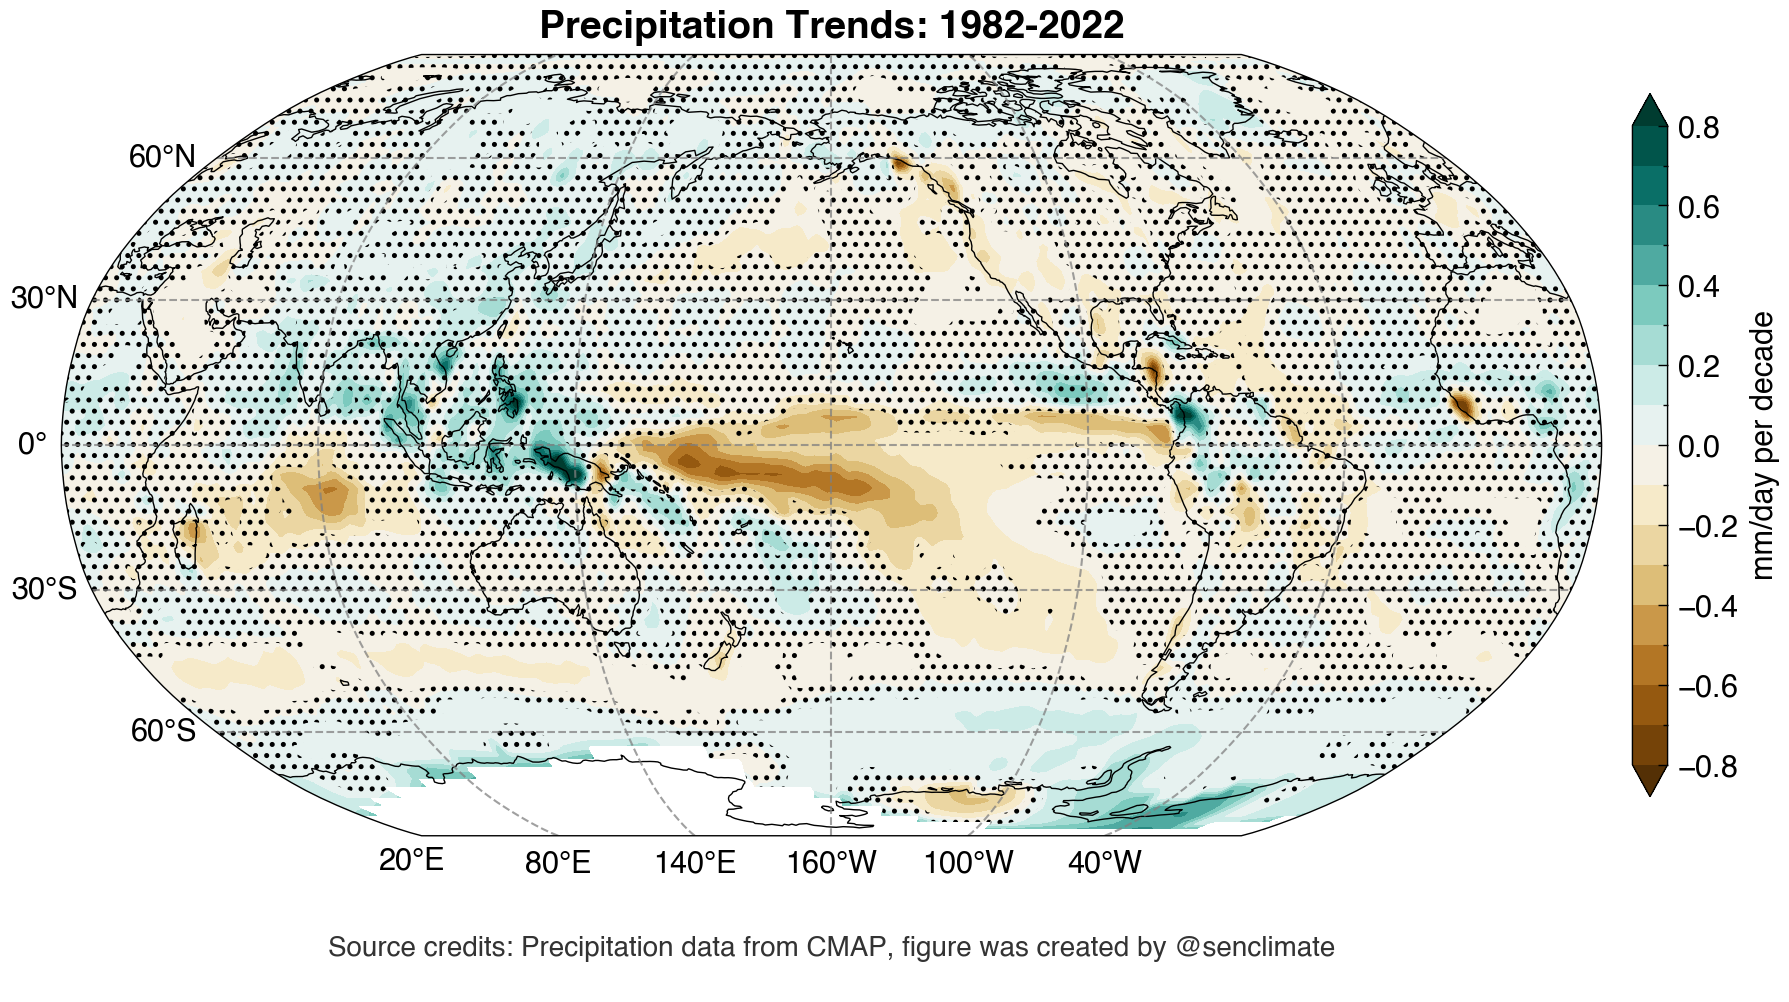

In [4]:
var_trd_cdict = sp.cmap.dict_cmap_contourf(levels=np.arange(-0.8, 0.81, step=0.1), name='BrBG', extend='both')

fig, ax = sp.map_subplots(1, 1, figsize=(10, 5), proj='robin', lon_0=200, aspect=1., layout='compressed')

imag0 = ax.contourf(var_trd_ann.lon, var_trd_ann.lat, var_trd_ann['s']*120, transform=sp.data_crs, **var_trd_cdict)
cb = fig.colorbar(imag0, ax=[ax], location='right', shrink=0.9, pad=0.02)
cb.set_label('mm/day per decade')

CS = ax.contourf(var_trd_ann.lon, var_trd_ann.lat, var_trd_ann['p'], transform=sp.data_crs, levels=[0, 0.05, 1], hatches=["", "..."], alpha=0)


sp.map_coastline(ax, color='black')
# sp.map_landmask(ax, fc='white', alpha=0)
sp.map_ticks(ax, lon_ticks=np.arange(20, 380, step=60) )
ax.set_title("Precipitation Trends: 1982-2022", fontsize=14, fontweight='bold')

# Add dataset and map sources
source_text = """
Source credits: Precipitation data from CMAP, figure was created by @senclimate
"""
ax.text(0.5, -0.2, source_text, transform=ax.transAxes, 
        fontsize=10, color='black', alpha=0.8, 
        ha='center', va='bottom', zorder=6);